<a href="https://colab.research.google.com/github/Huong1703/PTDL/blob/main/07_Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
import requests
response = requests.get('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv')
data = response.text
chipo = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv', sep='\t')
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

### Step 4. See the first 10 entries

In [4]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

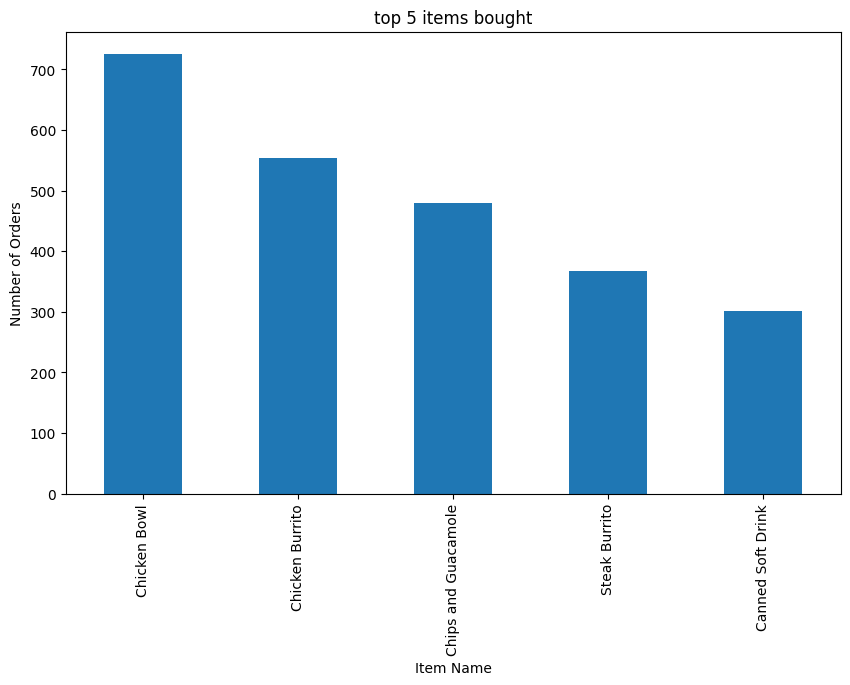

In [5]:
top_items = chipo['item_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar')
plt.title('top 5 items bought')
plt.xlabel('Item Name')
plt.ylabel('Number of Orders')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

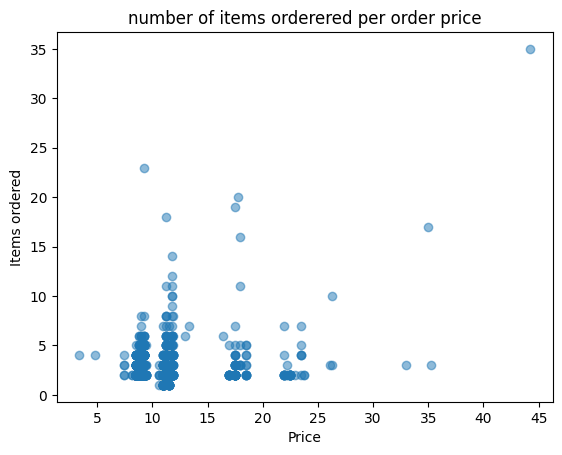

In [6]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]) if isinstance(x, str) else float(x))
orders = chipo.groupby('order_id').agg({'quantity': 'sum', 'item_price': 'max'})

plt.scatter(orders['item_price'], orders['quantity'], alpha=0.5)
plt.title('number of items orderered per order price')
plt.xlabel('Price')
plt.ylabel('Items ordered')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.